In [1]:
# Load pandas
import pandas as pd

# Load numpy
import numpy as np
np.set_printoptions(precision=3)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#pip install maptplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef as mcc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:

gerrit_data = pd.read_csv("./train_lines.csv", sep="$", index_col=0)
gerrit_data.reset_index(inplace=True)

In [3]:

gerrit_data.head(5)

,line,serializer->doReal,&iparams->cross_bb,krr,#include,gromacs/mdtypes/iforceprovider,/*,Target,cdh,startFrame,...,minres_,HAVE_RDTSCP,constraint_index,GMX_USE_NICE,YZX,alg,ftol,*GMX_SIMD_WIDTH_HERE,j+2,class_value
0,serializer->doReal(&iparams->cross...,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"#include ""gromacs/mdtypes/iforceprovider.h""",0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,/* Target mantissa accuracy forSIMD double pre...,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,"cdh.startFrame(frnr, fr.time)_",0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,sfree(mtop->molblock)_,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:

X = gerrit_data.drop(['class_value', 'line'], axis=1)
X.head(1)

,serializer->doReal,&iparams->cross_bb,krr,#include,gromacs/mdtypes/iforceprovider,/*,Target,cdh,startFrame,sfree,...,COUPLING,minres_,HAVE_RDTSCP,constraint_index,GMX_USE_NICE,YZX,alg,ftol,*GMX_SIMD_WIDTH_HERE,j+2
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = gerrit_data['class_value']

In [6]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

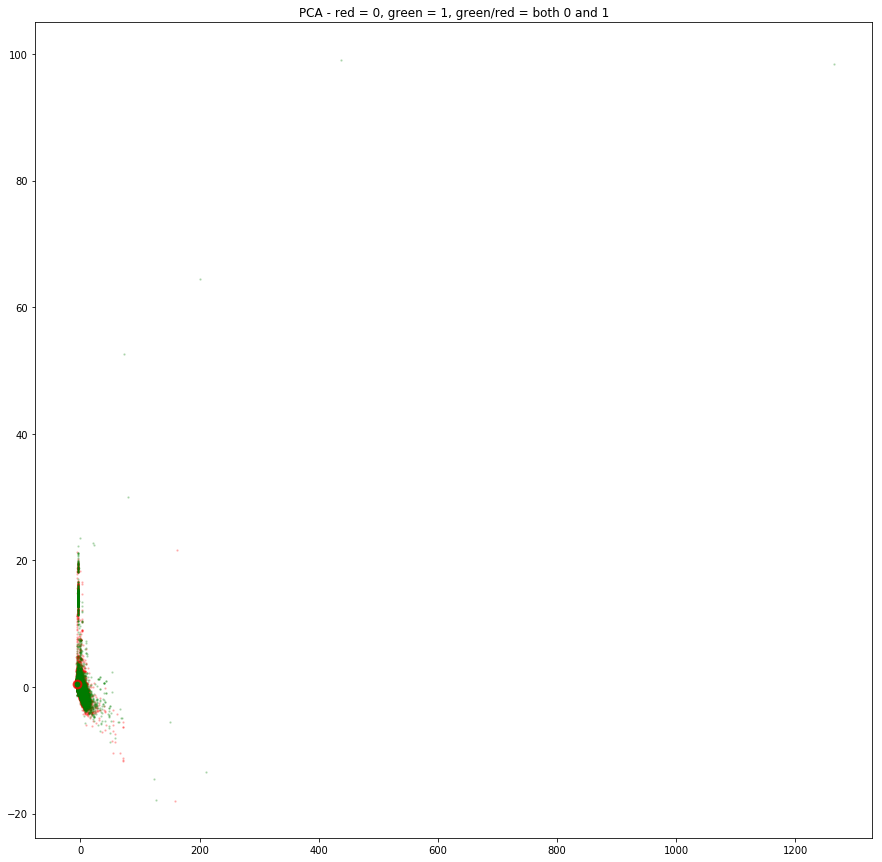

In [17]:
plt.figure(figsize=(15,15))

zero_ids = gerrit_data[gerrit_data['class_value'] == 0].index.tolist()
one_ids = gerrit_data[gerrit_data['class_value'] == 1].index.tolist()

plt.scatter(result[zero_ids, 0], result[zero_ids, 1], color='red', alpha=0.2, s=2)
plt.scatter(result[one_ids, 0], result[one_ids, 1], color='green', alpha=0.2, s=2)

zeros = set()
ones = set()
for x in result[zero_ids, :]:
    zeros.add((x[0], x[1]))
for x in result[one_ids, :]:
    ones.add((x[0], x[1]))

both = zeros & ones 
both_arr = np.array(list(both))

plt.scatter(both_arr[:,0], 
            both_arr[:,1], color='green', edgecolors='red', s=60, alpha=0.8, linewidth='2')

plt.title("PCA - red = 0, green = 1, green/red = both 0 and 1")

plt.show()
plt.close()



In [8]:
both_arr

array([[-5.664,  0.442]])

In [9]:
f"There are {len(both)} out of {gerrit_data.shape[0]} duplicated rows with different labels"

'There are 1 out of 37635 duplicated rows with different labels'

In [10]:
model = RandomForestClassifier()

In [11]:

model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [12]:
y_pred = model.predict(X)

In [13]:
accuracy_score(y, y_pred)

0.9874850538062974

In [14]:
mcc(y, y_pred)

0.9747376518838046

In [15]:
model = DummyClassifier()
model.fit(X, y)
y_pred = model.predict(X)
accuracy_score(y, y_pred)

0.5097117045303574